# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [64]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key
temp_units = "imperial"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={temp_units}&q="

## Generate Cities List

In [65]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

619

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [66]:
city_two = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

# set initial count quantities for organization
count_one = 0
set_one = 1

# loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 49:
            count_one = 1
            set_one += 1
            city_two.append(city)
        else:
            count_one += 1
            city_two.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------")
print("Data Retrieval Complete")
print("------------------------------")

Processing Record 1 of Set 1 | nouadhibou
City not found. Skipping...
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | pedernales
Processing Record 4 of Set 1 | cabo san lucas
Processing Record 5 of Set 1 | atuona
Processing Record 6 of Set 1 | hobart
Processing Record 7 of Set 1 | leopold
City not found. Skipping...
Processing Record 8 of Set 1 | sao filipe
Processing Record 9 of Set 1 | leo
Processing Record 10 of Set 1 | lompoc
Processing Record 11 of Set 1 | grand gaube
Processing Record 12 of Set 1 | mys shmidta
Processing Record 13 of Set 1 | yellowknife
Processing Record 14 of Set 1 | hermanus
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | kaeo
Processing Record 17 of Set 1 | rikitea
City not found. Skipping...
Processing Record 18 of Set 1 | vostok
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | arraial do cabo
Processing Record 21 of Set 1 | ribeira grande
Processing Record 22 of Set 1 | ukiah
Processing

City not found. Skipping...
Processing Record 34 of Set 4 | ipixuna
Processing Record 35 of Set 4 | teya
Processing Record 36 of Set 4 | port lincoln
Processing Record 37 of Set 4 | flinders
Processing Record 38 of Set 4 | ivaipora
Processing Record 39 of Set 4 | vilyuysk
Processing Record 40 of Set 4 | saskylakh
Processing Record 41 of Set 4 | avera
Processing Record 42 of Set 4 | georgetown
Processing Record 43 of Set 4 | klaksvik
Processing Record 44 of Set 4 | iqaluit
Processing Record 45 of Set 4 | yaring
Processing Record 46 of Set 4 | jiaozhou
Processing Record 47 of Set 4 | zhigansk
City not found. Skipping...
Processing Record 48 of Set 4 | ati
Processing Record 49 of Set 4 | faanui
Processing Record 50 of Set 4 | berlevag
City not found. Skipping...
Processing Record 1 of Set 5 | gamba
Processing Record 2 of Set 5 | norman wells
Processing Record 3 of Set 5 | hofn
Processing Record 4 of Set 5 | erzin
Processing Record 5 of Set 5 | vao
City not found. Skipping...
Processing Re

Processing Record 16 of Set 8 | caravelas
Processing Record 17 of Set 8 | svetlogorsk
Processing Record 18 of Set 8 | sampit
Processing Record 19 of Set 8 | juneau
Processing Record 20 of Set 8 | alice springs
Processing Record 21 of Set 8 | magadan
Processing Record 22 of Set 8 | saldanha
Processing Record 23 of Set 8 | anjar
Processing Record 24 of Set 8 | kasongo-lunda
Processing Record 25 of Set 8 | chapais
Processing Record 26 of Set 8 | hovd
Processing Record 27 of Set 8 | almeirim
Processing Record 28 of Set 8 | pirovskoye
Processing Record 29 of Set 8 | samarai
Processing Record 30 of Set 8 | silifke
Processing Record 31 of Set 8 | mopipi
Processing Record 32 of Set 8 | muzhi
Processing Record 33 of Set 8 | makakilo city
City not found. Skipping...
Processing Record 34 of Set 8 | nyurba
Processing Record 35 of Set 8 | ewa beach
Processing Record 36 of Set 8 | corralillo
City not found. Skipping...
City not found. Skipping...
Processing Record 37 of Set 8 | ryazan
Processing Rec

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [67]:
city_data = {"City":city_two,
    "Cloudiness":cloudinesses,
    "Country":countries,
    "Date":dates,
    "Humidity":humidities,
    "Lat":lats,
    "Lng":lngs,
    "Max Temp":max_temps,
    "Wind Speed":wind_speeds}

city_weather_dataframe = pd.DataFrame(city_data)
city_weather_dataframe.to_csv(output_data_file, index = False)

city_weather_dataframe.count()

City          544
Cloudiness    544
Country       544
Date          544
Humidity      544
Lat           544
Lng           544
Max Temp      544
Wind Speed    544
dtype: int64

In [68]:
city_weather_dataframe.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,nouadhibou,0,MR,1579665267,72,20.93,-17.03,59.00,13.87
1,ushuaia,40,AR,1579665494,70,-54.80,-68.30,46.40,21.92
2,pedernales,84,DO,1579665494,90,18.04,-71.74,65.71,2.55
3,cabo san lucas,40,BR,1579665494,83,-8.28,-35.03,82.40,5.82
4,atuona,68,PF,1579665494,74,-9.80,-139.03,81.01,12.84


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

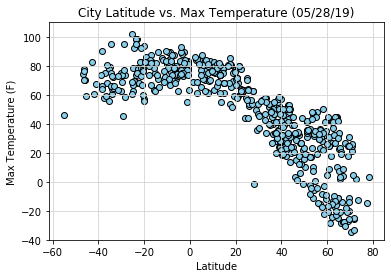

In [69]:
plt.scatter(city_weather_dataframe["Lat"],city_weather_dataframe["Max Temp"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Max Temperature (05/28/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.ylim(-40,110)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("City Latitude vs. Max Temperature.png")
plt.show()

#### Latitude vs. Humidity Plot

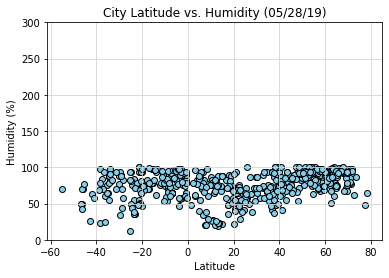

In [70]:
plt.scatter(city_weather_dataframe["Lat"],city_weather_dataframe["Humidity"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Humidity (05/28/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(0,300)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("City Latitude vs. Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

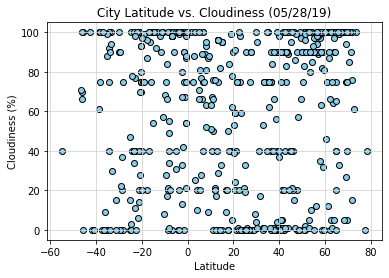

In [71]:
plt.scatter(city_weather_dataframe["Lat"],city_weather_dataframe["Cloudiness"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Cloudiness (05/28/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.ylim(-5,105)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("City Latitude vs. Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

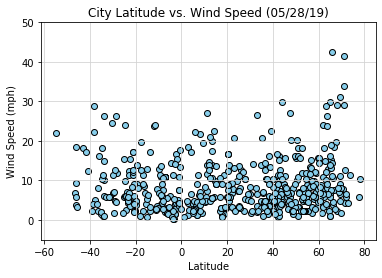

In [72]:
plt.scatter(city_weather_dataframe["Lat"],city_weather_dataframe["Wind Speed"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Wind Speed (05/28/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-5,50)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("City Latitude vs. Windspeed.png")
plt.show()

## Linear Regression

In [73]:
# OPTIONAL: Create a function to create Linear Regression plots


In [74]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = city_weather_dataframe.loc[city_weather_dataframe["Lat"] >= 0]
southern_hemisphere = city_weather_dataframe.loc[city_weather_dataframe["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : -0.84
There is a strong negative correlation between Max Temp and Latitude in the N. Hemisphere.


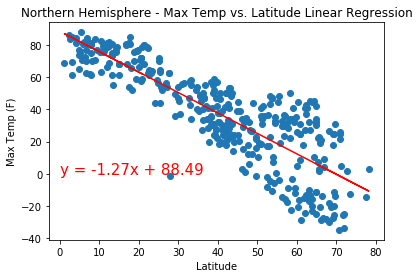

In [75]:
north_lat = northern_hemisphere["Lat"]
north_max = northern_hemisphere["Max Temp"]

print(f"The r-squared is : {round(st.pearsonr(north_lat, north_max)[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])

regress_values = northern_hemisphere["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])

plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")

plt.xlabel("Latitude")

plt.ylabel("Max Temp (F)")

plt.plot(northern_hemisphere["Lat"],regress_values,"r-")

plt.annotate(line_eq,(0,0),fontsize=15,color="red")

print("There is a strong negative correlation between Max Temp and Latitude in the N. Hemisphere.")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.31
There is a moderate correlation between Max Temp and Latitude in the S. Hemisphere.


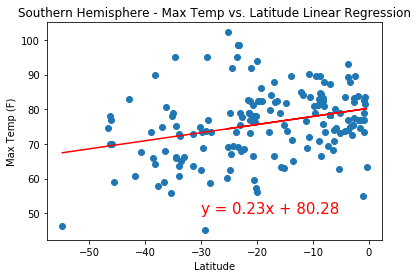

In [76]:
south_lat = southern_hemisphere["Lat"]
south_max = southern_hemisphere["Max Temp"]

print(f"The r-squared is : {round(st.pearsonr(south_lat, south_max)[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemisphere["Lat"], southern_hemisphere["Max Temp"])

regress_values = southern_hemisphere["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southern_hemisphere["Lat"], southern_hemisphere["Max Temp"])

plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")

plt.xlabel("Latitude")

plt.ylabel("Max Temp (F)")

plt.plot(southern_hemisphere["Lat"],regress_values,"r-")

plt.annotate(line_eq,(-30,50),fontsize=15,color="red")

print("There is a moderate correlation between Max Temp and Latitude in the S. Hemisphere.")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.48
There is not a moderate correlation between Humidity and Latitude in the N. Hemisphere.


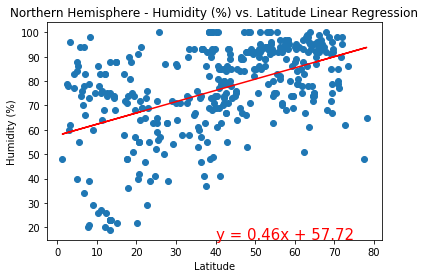

In [77]:
north_humidity = northern_hemisphere["Humidity"]
print(f"The r-squared is : {round(st.pearsonr(north_lat, north_humidity)[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])

regress_values = northern_hemisphere["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])

plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

plt.xlabel("Latitude")

plt.ylabel("Humidity (%)")

plt.plot(northern_hemisphere["Lat"],regress_values,"r-")

plt.annotate(line_eq,(40,15),fontsize=15,color="red")

print("There is not a moderate correlation between Humidity and Latitude in the N. Hemisphere.")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.24
There is not a moderate correlation between Humidity and Latitude in the S. Hemisphere.


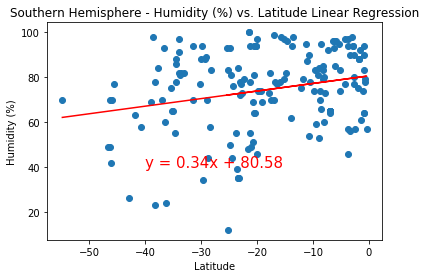

In [78]:
south_humidity = southern_hemisphere["Humidity"]

print(f"The r-squared is : {round(st.pearsonr(south_lat, south_humidity)[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])

regress_values = southern_hemisphere["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])

plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

plt.xlabel("Latitude")

plt.ylabel("Humidity (%)")

plt.plot(southern_hemisphere["Lat"],regress_values,"r-")

plt.annotate(line_eq,(-40,40),fontsize=15,color="red")

print("There is not a moderate correlation between Humidity and Latitude in the S. Hemisphere.")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.21
There is not a strong correlation between Cloudiness and Latitude in the N. Hemisphere.


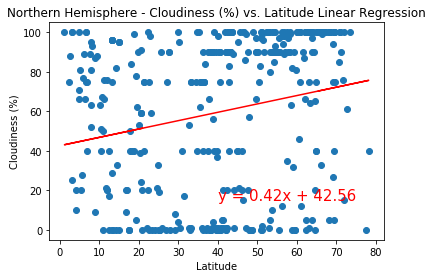

In [79]:
north_cloudiness = northern_hemisphere["Cloudiness"]

print(f"The r-squared is : {round(st.pearsonr(north_lat, north_cloudiness)[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])

regress_values = northern_hemisphere["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])

plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

plt.xlabel("Latitude")

plt.ylabel("Cloudiness (%)")

plt.plot(northern_hemisphere["Lat"],regress_values,"r-")

plt.annotate(line_eq,(40,15),fontsize=15,color="red")

print("There is not a strong correlation between Cloudiness and Latitude in the N. Hemisphere.")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.18
There is not a strong correlation between Cloudiness and Latitude in the S. Hemisphere.


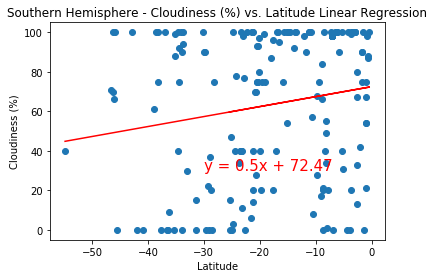

In [80]:
south_cloudiness = southern_hemisphere["Cloudiness"]

print(f"The r-squared is : {round(st.pearsonr(south_lat, south_cloudiness)[0],2)}")


(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])

regress_values = southern_hemisphere["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])

plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

plt.xlabel("Latitude")

plt.ylabel("Cloudiness (%)")

plt.plot(southern_hemisphere["Lat"],regress_values,"r-")

plt.annotate(line_eq,(-30,30),fontsize=15,color="red")

print("There is not a strong correlation between Cloudiness and Latitude in the S. Hemisphere.")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.14
There is not a strong correlation between Wind Speed and Latitude in the N. Hemisphere.


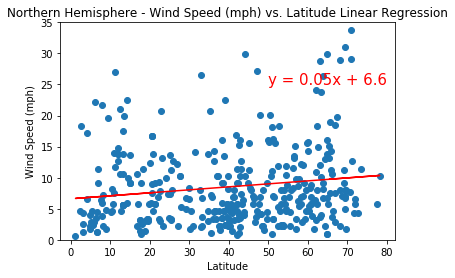

In [81]:
north_wind = northern_hemisphere["Wind Speed"]

print(f"The r-squared is : {round(st.pearsonr(north_lat, north_wind)[0],2)}")


(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])

regress_values = northern_hemisphere["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])

plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

plt.xlabel("Latitude")

plt.ylabel("Wind Speed (mph)")

plt.ylim(0, 35)

plt.plot(northern_hemisphere["Lat"],regress_values,"r-")

plt.annotate(line_eq,(50,25),fontsize=15,color="red")

print("There is not a strong correlation between Wind Speed and Latitude in the N. Hemisphere.")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.22
There is not a strong correlation between Wind Speed and Latitude in the S. Hemisphere.


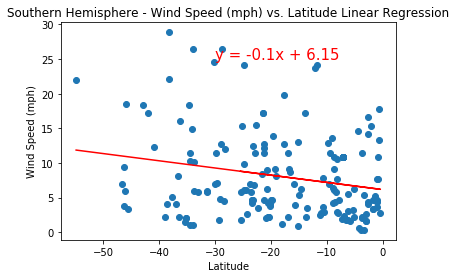

In [82]:
south_wind = southern_hemisphere["Wind Speed"]

print(f"The r-squared is : {round(st.pearsonr(south_lat, south_wind)[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])

regress_values = southern_hemisphere["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])

plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

plt.xlabel("Latitude")

plt.ylabel("Wind Speed (mph)")

plt.plot(southern_hemisphere["Lat"],regress_values,"r-")

plt.annotate(line_eq,(-30,25),fontsize=15,color="red")

print("There is not a strong correlation between Wind Speed and Latitude in the S. Hemisphere.")